# Time Series

In [1]:
import pandas as pd
import numpy as np

np.random.seed(252)

def random_series(dts):
    res = pd.Series(np.random.randn(len(dts)), index=dts)
    return res

No new classes for Series and DataFrame. 
A "timeseries" is a Series with a time index of some type. 

### Create a simple time series
- Standard dateime import
- Create a scalar time series
- Show the new type of index - note no freq. 

In [2]:
import datetime as dt

In [3]:
ts = pd.Timestamp('2000-01-01 00:00')

In [4]:
s1 = pd.Series(101.7, index=[ts])
s1

2000-01-01    101.7
dtype: float64

In [5]:
s1.index

DatetimeIndex(['2000-01-01'], dtype='datetime64[ns]', freq=None)

### Time Series Utility Functions

In [6]:
# Create a year's worth of business dates
dts = pd.date_range('2000-01-01', '2001-12-31', freq='B')
ts = pd.Series(np.random.randn(len(dts)), index=dts)
ts.head()

2000-01-03   -0.011498
2000-01-04   -0.085123
2000-01-05    0.075910
2000-01-06   -1.649279
2000-01-07   -0.751812
Freq: B, dtype: float64

### Selecting from a Time Series

Notice how the slicing selects across non-cotigous dates.

In [7]:
ts['2000-03-20'] # ts.loc['2000-03-20']

1.3091432326146675

In [8]:
ts['2000-03-24':'2000-03-30']

2000-03-24    0.360544
2000-03-27   -0.820640
2000-03-28    0.106317
2000-03-29    1.364270
2000-03-30   -0.490908
Freq: B, dtype: float64

#### Select by month

In [9]:
ts['2000-02'].head()

2000-02-01    1.157154
2000-02-02    2.183902
2000-02-03   -0.286083
2000-02-04    1.283730
2000-02-07    0.570529
Freq: B, dtype: float64

#### Select by year

In [10]:
ts['2000'].head()

2000-01-03   -0.011498
2000-01-04   -0.085123
2000-01-05    0.075910
2000-01-06   -1.649279
2000-01-07   -0.751812
Freq: B, dtype: float64

### Lagging/Shifting

#### Lagging by value

In [11]:
ts2k = ts['2000-01'].copy()
ts2k.shift(1).iloc[[0, 1, 2, -2, -1]]

2000-01-03         NaN
2000-01-04   -0.011498
2000-01-05   -0.085123
2000-01-28   -1.724383
2000-01-31   -0.858197
dtype: float64

Notice that the index is constant. We lose the first value. 

#### Shifting by Index

The values remain constant but the index shifts.

In [12]:
ts2k.tshift(1).iloc[[0, 1, 2, -2, -1]]

<ipython-input-12-0c8813831beb>:1: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  ts2k.tshift(1).iloc[[0, 1, 2, -2, -1]]


2000-01-04   -0.011498
2000-01-05   -0.085123
2000-01-06    0.075910
2000-01-31   -0.858197
2000-02-01    1.681411
dtype: float64

pandas understands the type of index  so the last element in the Series is updated to the next month!

### Changing Frequencies: Resampleing

Resampling is similar to grouping, expect with time and notions of forwards and backwards.

In [13]:
dts1 = pd.date_range('2000-01-01', '2000-03-31', freq='D')
ts3 = pd.Series(np.random.randn(len(dts1)), index=dts1)

In [14]:
grp = ts3.resample('M')

#### Resample is like grouping

In [15]:
grp.mean()

2000-01-31   -0.210334
2000-02-29   -0.019870
2000-03-31    0.213579
Freq: M, dtype: float64

### Filling Missing Data

In [16]:
def make_series_4():
    dts = pd.date_range('2000-01-02', '2000-01-07', freq='D')
    rv = pd.Series(np.random.randn(len(dts)), index=dts)
    rv.iloc[[0, 2, 5]] = np.nan
    return rv

ts4 = make_series_4()
ts4

2000-01-02         NaN
2000-01-03    1.301518
2000-01-04         NaN
2000-01-05   -1.452010
2000-01-06    1.001597
2000-01-07         NaN
Freq: D, dtype: float64

#### Filling Data Forward

In [17]:
ts4.ffill()

2000-01-02         NaN
2000-01-03    1.301518
2000-01-04    1.301518
2000-01-05   -1.452010
2000-01-06    1.001597
2000-01-07    1.001597
Freq: D, dtype: float64

#### Filling Data Backwards

In [18]:
ts4.bfill()

2000-01-02    1.301518
2000-01-03    1.301518
2000-01-04   -1.452010
2000-01-05   -1.452010
2000-01-06    1.001597
2000-01-07         NaN
Freq: D, dtype: float64

#### Filling with limits

In [19]:
def make_series_5():
    dts = pd.date_range('2000-01-01', '2000-01-05', freq='D')
    rv = pd.Series(np.random.randn(len(dts)), index=dts)
    rv[1:] = np.nan
    return rv

ts5 = make_series_5()
ts5

2000-01-01    1.33151
2000-01-02        NaN
2000-01-03        NaN
2000-01-04        NaN
2000-01-05        NaN
Freq: D, dtype: float64

In [20]:
ts5.ffill(limit=2)

2000-01-01    1.33151
2000-01-02    1.33151
2000-01-03    1.33151
2000-01-04        NaN
2000-01-05        NaN
Freq: D, dtype: float64

### Aligning Dates
#### Sample Data
Create a monthly and daily series.

In [21]:
dts_m = pd.bdate_range('2000-01', periods=2, freq='MS')
t_bill = pd.Series([0.012, 0.023], index=dts_m)

dts_d = pd.bdate_range('2000-01-01', periods=8, freq='W')
sp5_weekly = random_series(dts_d)

In [22]:
sp5_weekly

2000-01-02   -1.352033
2000-01-09   -0.185830
2000-01-16   -1.156032
2000-01-23   -0.608064
2000-01-30   -1.120766
2000-02-06   -2.069586
2000-02-13   -0.499210
2000-02-20   -0.201274
Freq: W-SUN, dtype: float64

In [23]:
t_bill

2000-01-01    0.012
2000-02-01    0.023
Freq: MS, dtype: float64

#### Using reindex

In [24]:
t_bill.reindex(sp5_weekly.index)

2000-01-02   NaN
2000-01-09   NaN
2000-01-16   NaN
2000-01-23   NaN
2000-01-30   NaN
2000-02-06   NaN
2000-02-13   NaN
2000-02-20   NaN
Freq: W-SUN, dtype: float64

#### Reindex and fill forward

In [25]:
t_bill.reindex(sp5_weekly.index, method='ffill')

2000-01-02    0.012
2000-01-09    0.012
2000-01-16    0.012
2000-01-23    0.012
2000-01-30    0.012
2000-02-06    0.023
2000-02-13    0.023
2000-02-20    0.023
Freq: W-SUN, dtype: float64

### Rolling Calculuations

In [26]:
roll = sp5_weekly.rolling(2)

In [27]:
roll

Rolling [window=2,center=False,axis=0]

In [28]:
roll.mean()

2000-01-02         NaN
2000-01-09   -0.768931
2000-01-16   -0.670931
2000-01-23   -0.882048
2000-01-30   -0.864415
2000-02-06   -1.595176
2000-02-13   -1.284398
2000-02-20   -0.350242
Freq: W-SUN, dtype: float64

In [29]:
import pandas as pd

In [30]:
dfts=pd.DataFrame(ts,columns=['Value'])

In [31]:
dfts=dfts.reset_index()
dfts=dfts.rename(columns={'index':'Date'})

In [32]:
dfts

,Date,Value
0,2000-01-03,-0.011498
1,2000-01-04,-0.085123
2,2000-01-05,0.075910
3,2000-01-06,-1.649279
4,2000-01-07,-0.751812
...,...,...
516,2001-12-25,1.583837
517,2001-12-26,-0.362809
518,2001-12-27,0.500747
519,2001-12-28,-1.402560


### Auto-Regressive Moving Average (ARIMA)



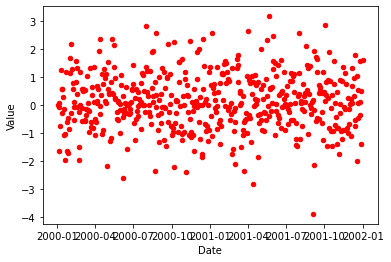

In [33]:
import matplotlib.pyplot as plt

# a scatter plot comparing num_children and num_pets
dfts.plot(kind='scatter',x='Date',y='Value',color='red')
plt.show()

#### Auto Regression

Split the data into train and test at 8:2 ratio of total data. 
In case of time series, sequence of data points is very essential so one should keep in mind not tolose the order during splitting of data.


In [34]:
split=len(dfts)-int(0.2*len(dfts))

In [35]:
train,test=dfts['Value'][0:split],dfts['Value'][split:]

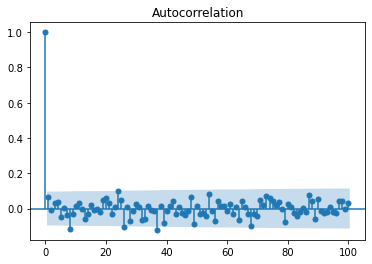

In [36]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(train,lags=100)
plt.show()

All the lag values lying outside the shaded blue region are assumed to have a correlation. 

#### Moving Average

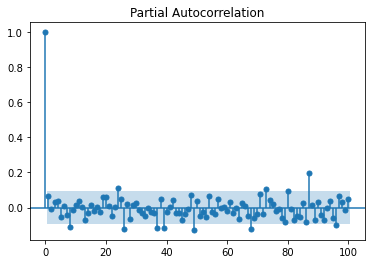

In [37]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(train,lags=100)
plt.show()

Various methods to find the stationarity of a time series are looking for seasonality or trend in the plot of time series, checking the difference in mean and variance for various time periods, Augmented Dickey-Fuller (ADF) test, KPSS test, Hurst’s exponent etc.

In [38]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(train)
print('ADF Statistic: %f' % result[0])  
print('p-value: %f' % result[1])  
print('Critical Values:')  
result[4]

ADF Statistic: -19.080404
p-value: 0.000000
Critical Values:


{'1%': -3.4461675720270404,
 '5%': -2.8685128587855955,
 '10%': -2.5704843086630915}

- The ADF Statistic with the critical values, a lower critical value tells us the series is most likely non-stationary. 
- A p-value greater than 0.05 also suggests that the time series is non-stationary. 

In [39]:
pip install hurst

Note: you may need to restart the kernel to use updated packages.


In [40]:
from hurst import compute_Hc

H, c, data=compute_Hc(train)
print(H)
print(c)

0.15356437078604027
1.7732804737072434


We can also confirm the statioanry of time series using Hurst exponent. 

The value of H<0.5 shows anti-persistent behavior, and H>0.5 shows persistent behavior or a trending series. The value of H<0.5, confriming that the series is stationary. 

For non-stationary time series, we set "d" parameter as 1. Also, the value of the auto-regressive trend parameter "p" and the moving average trend parameter "q" is calculated on the stationary time series by plotting ACP and PACP after differening the time series. 

ARIMA model, which is characterized by 3 parameters, (p,d,q). 

In [41]:
from statsmodels.tsa.arima_model import ARIMA  

In [42]:
model = ARIMA(train.values, order=(10, 0, 10))
model_fit=model.fit(disp=False)

/Users/insukjang/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/insukjang/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bs

In [43]:
predictions=model_fit.predict(len(test))
test=pd.DataFrame(test)
test['predictions']=predictions[0:len(test)]

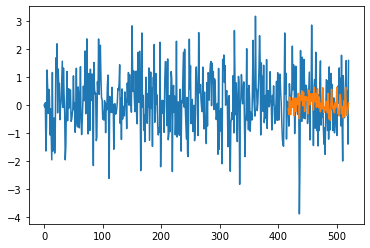

In [44]:
plt.plot(dfts['Value'])
plt.plot(test.predictions)
plt.show()

In [45]:
from sklearn import metrics
from math import sqrt
error=sqrt(metrics.mean_squared_error(test.Value,test.predictions[0:len(test)]))
print("Test RMSE for ARIMA:",error)

Test RMSE for ARIMA: 1.0416463396765687


In [46]:
model = ARIMA(train.values, order=(8, 0, 3))
model_fit=model.fit(disp=False)

/Users/insukjang/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [47]:
predictions=model_fit.predict(len(test))
test=pd.DataFrame(test)
test['predictions']=predictions[0:len(test)]

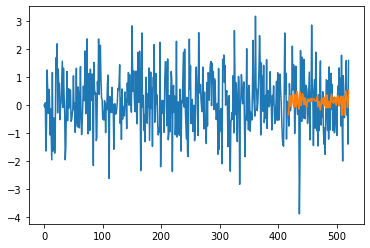

In [48]:
plt.plot(dfts['Value'])
plt.plot(test.predictions)
plt.show()

In [49]:
from sklearn import metrics
from math import sqrt
error=sqrt(metrics.mean_squared_error(test.Value,test.predictions[0:len(test)]))
print("Test RMSE for ARIMA:",error)

Test RMSE for ARIMA: 1.0561518234824692
